In [1]:
import importlib

import mysklearn.myutils
importlib.reload(mysklearn.myutils)
import mysklearn.myutils as myutils

import plot_utils
importlib.reload(plot_utils)
import plot_utils as plot_utils

import mysklearn.mypytable
importlib.reload(mysklearn.mypytable)
from mysklearn.mypytable import MyPyTable 

import mysklearn.myclassifiers
importlib.reload(mysklearn.myclassifiers)
from mysklearn.myclassifiers import MyKNeighborsClassifier, MyDummyClassifier, MyNaiveBayesClassifier, MyDecisionTreeClassifier, MyRandomForestClassifier

import mysklearn.myevaluation
importlib.reload(mysklearn.myevaluation)
import mysklearn.myevaluation as myevaluation

In [2]:
ski_dataset = MyPyTable().load_from_file("./input_data/ski-resorts.csv")

# exploring different attribute combinations
ski_X = ski_dataset.get_columns(["elevation_top_m", "number_of_slopes", "annual_snowfall_cm"])
ski_y = ski_dataset.get_column("rating")

matrix_headers = ["rating", "high", "above average", "average", "below average", "low", "Total", "Recognition (%)"]

discretizer = myutils.discretize_ranking

## kNN classification of ski dataset

In [3]:
# TODO: modify categorical method in kNN to be a given list
knn_clf = MyKNeighborsClassifier()

knn_actual, knn_pred, knn_accuracy, knn_error = myevaluation.cross_val_predict\
    (ski_X, ski_y, knn_clf, discretizer=discretizer, n_splits=10, shuffle=True, stratify=True)

myutils.randomize_in_place(knn_actual, knn_pred)
print(knn_actual[:20])
print(knn_pred[:20])

print(f"Accuracy: {knn_accuracy}, Error Rate: {knn_error}")
print()

matrix = myevaluation.confusion_matrix(knn_actual, knn_pred, matrix_headers[1:6])
print(myevaluation.tabulate_confusion_matrix(matrix, headers=matrix_headers))

['above average', 'average', 'above average', 'below average', 'average', 'above average', 'average', 'average', 'below average', 'high', 'average', 'average', 'above average', 'high', 'low', 'high', 'below average', 'average', 'average', 'below average']
['low', 'below average', 'average', 'low', 'average', 'average', 'below average', 'below average', 'low', 'above average', 'above average', 'average', 'high', 'above average', 'low', 'high', 'low', 'below average', 'above average', 'average']
Accuracy: 0.37850182704019486, Error Rate: 0.6214981729598051

rating           high    above average    average    below average    low    Total    Recognition (%)
-------------  ------  ---------------  ---------  ---------------  -----  -------  -----------------
high              143              201        119               25      5      493                 29
above average      29              140        310              132     47      658                 21
average             9         

# Naive Bayes Classification

In [4]:
import copy
nb_X = copy.deepcopy(ski_X)
nb_y = ski_y[:]
for i, row in enumerate(nb_X):
    row[0] = myutils.discretize_elevation(row[0])
    row[1] = myutils.discretize_num_slopes(row[1])
    row[2] = myutils.discretize_snowfall(row[2])
    nb_y[i] = discretizer(nb_y[i])
print(nb_X[1])
print(ski_X[1])
nb_clf = MyNaiveBayesClassifier()

nb_actual, nb_pred, nb_accuracy, nb_error = myevaluation.cross_val_predict\
    (nb_X, nb_y, nb_clf, n_splits=10, shuffle=True, stratify=True)

myutils.randomize_in_place(nb_actual, nb_pred)
print(nb_actual[:20])
print(nb_pred[:20])

print(f"Accuracy: {nb_accuracy}, Error Rate: {nb_error}")
print()

matrix = myevaluation.confusion_matrix(nb_actual, nb_pred, matrix_headers[1:6])
print(myevaluation.tabulate_confusion_matrix(matrix, headers=matrix_headers))

['high', 'high', 'high']
[3899.0, 69.0, 450.0]


['below average', 'below average', 'below average', 'average', 'average', 'high', 'low', 'average', 'average', 'low', 'high', 'low', 'high', 'below average', 'average', 'average', 'above average', 'above average', 'high', 'average']
['low', 'average', 'below average', 'average', 'average', 'above average', 'below average', 'average', 'below average', 'low', 'high', 'below average', 'high', 'below average', 'below average', 'average', 'above average', 'above average', 'high', 'low']
Accuracy: 0.5200974421437271, Error Rate: 0.4799025578562729

rating           high    above average    average    below average    low    Total    Recognition (%)
-------------  ------  ---------------  ---------  ---------------  -----  -------  -----------------
high              361               97         23                0     12      493                 73
above average     139              192        276               26     25      658                 29
average            31              124     

In [5]:
# TODO: ask Professor Sprint where part 4 of random forest should be implemented - in predict?
# TODO: ask Professor Sprint how we should handle our categorical decision tree issue - discretizer for X attributes?
forest_clf = MyRandomForestClassifier()

# discretize the output
y_disc = [discretizer(y) for y in ski_y]

# using N=5, M=3, F=2 as a "control"
X_test, y_test = forest_clf.fit(ski_X, y_disc, 5, 3, 2)
forest_pred = forest_clf.predict(X_test)

forest_accuracy = myevaluation.accuracy_score(y_test, forest_pred)
forest_error = 1 - forest_accuracy

forest_actual = y_test

print(f"Accuracy: {forest_accuracy}, Error Rate: {forest_error}")
print()

# matrix = myevaluation.confusion_matrix(forest_actual, forest_pred, matrix_headers[1:8])
# print(myevaluation.tabulate_confusion_matrix(matrix, headers=matrix_headers))

Accuracy: 0.4337899543378995, Error Rate: 0.5662100456621004



## Issues faced
In regards to random forest, we are facing two primary issues. First, predictions sometimes are not being made. This is a bug that will likely be ironed out as we solve the next issue.


Another issue is that continuous attributes are being treated as categorical, which leads to a decision trees with hundreds if not thousands of branches.


In [6]:
# This version tends very much towards average, but we have already addressed this by changing the distributions of the discretizer.
print("actual",y_test[:10])
print("predicted",forest_pred[:10])
print()

tree = forest_clf.forest[0]
# tree.print_decision_rules()

actual ['high', 'high', 'high', 'high', 'high', 'high', 'high', 'high', 'high', 'high']
predicted ['', 'high', 'average', '', 'above average', 'high', 'high', 'high', '', '']



Truncated output of tree.print_decision_rules()

IF att1 == 0.0 THEN class = high  
IF att1 == 1.0 THEN class = below average  
IF att1 == 2.0 THEN class = average  
IF att1 == 3.0 THEN class = average  
IF att1 == 4.0 THEN class = average  
IF att1 == 5.0 THEN class = average  
IF att1 == 6.0 THEN class = average  
IF att1 == 7.0 THEN class = above average  
IF att1 == 8.0 THEN class = average  
IF att1 == 9.0 THEN class = above average  
IF att1 == 10.0 THEN class = average

## Data Visualizations

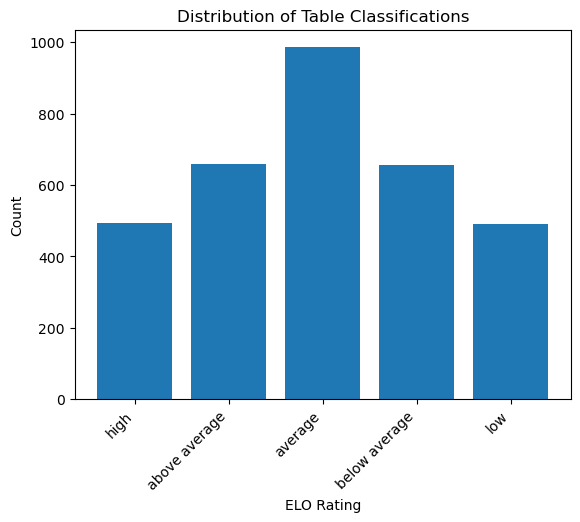

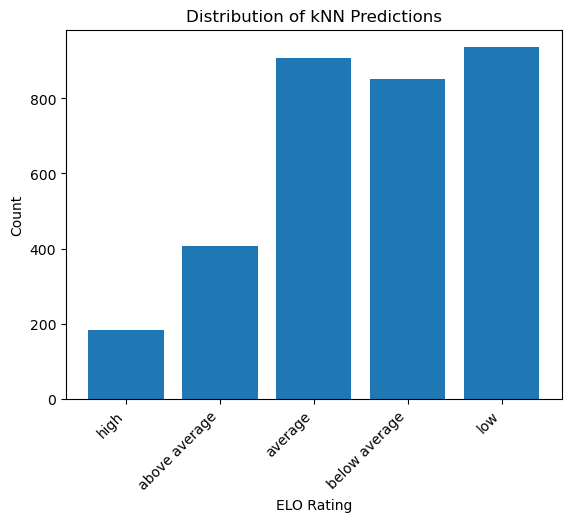

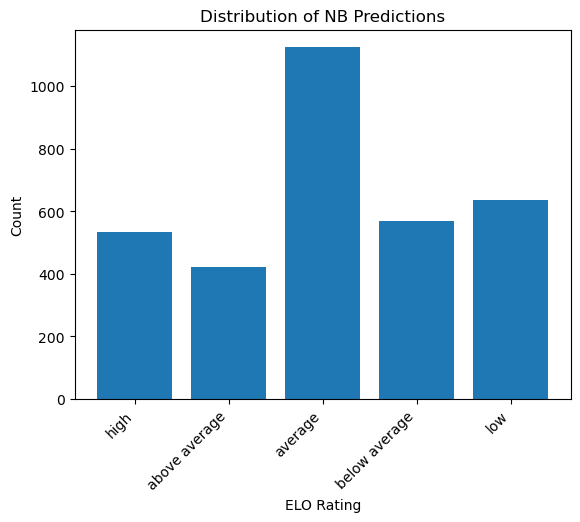

In [7]:
import matplotlib.pyplot as plt

# will make own method
y_disc = [discretizer(y) for y in ski_y]
values, counts = myutils.get_frequencies(y_disc)

order = [3, 0, 1, 2, 4]
ordered_values = [values[i] for i in order]
ordered_counts = [counts[i] for i in order]

plt.figure()
plt.bar(ordered_values, ordered_counts)
plt.xlabel("ELO Rating")
plt.ylabel("Count")
plt.title(f"Distribution of Table Classifications")
plt.xticks(rotation=45, ha="right")
plt.show()

# knn visualization
values_knn, counts_knn = myutils.get_frequencies(knn_pred)

ordered_values_knn = [values_knn[i] for i in order]
ordered_counts_knn = [counts_knn[i] for i in order]

plt.figure()
plt.bar(ordered_values_knn, ordered_counts_knn)
plt.xlabel("ELO Rating")
plt.ylabel("Count")
plt.title(f"Distribution of kNN Predictions")
plt.xticks(rotation=45, ha="right")
plt.show()

# nb visualization
values_nb, counts_nb = myutils.get_frequencies(nb_pred)
ordered_values_nb = [values_nb[i] for i in order]
ordered_counts_nb = [counts_nb[i] for i in order]

plt.figure()
plt.bar(ordered_values_nb, ordered_counts_nb)
plt.xlabel("ELO Rating")
plt.ylabel("Count")
plt.title(f"Distribution of NB Predictions")
plt.xticks(rotation=45, ha="right")
plt.show()